# View positions and select neurons based on transcripts

It can also be valuable to spread out the classes into the whole connectome and visualize the position of neurons with respect 
to the whole nervous system and the body of the worm.


### Here we look at ways to view positions of specific neurons in the neuronal network in different orientations, and select a subset of neurons based on their transcripts.

In [1]:
from cedne import utils

/Users/sahilmoza/Library/Caches/pypoetry/virtualenvs/cedne-OqN2BZQP-py3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Load the worm and neural network as usual

In [2]:
w = utils.makeWorm()
nn = w.networks["Neutral"]

### This function allows plotting to view the positions of the neurons and highlight a subset of neurons

In [3]:
mec_17 = ['ALML', 'ALMR', 'AVM', 'PLML', 'PLMR', 'PVM']

[('ALML', '#CC5500'), ('ALMR', '#CC5500'), ('AVM', '#CC5500'), ('PVM', '#CC5500'), ('PLML', '#CC5500'), ('PLMR', '#CC5500')]


/Users/sahilmoza/Library/Caches/pypoetry/virtualenvs/cedne-OqN2BZQP-py3.12/lib/python3.12/site-packages/textalloc/__init__.py:306: UserWarning: Usage of allocate_text will be replaced with allocate in future releases, removing the need for the fig argument
  warnings.warn(


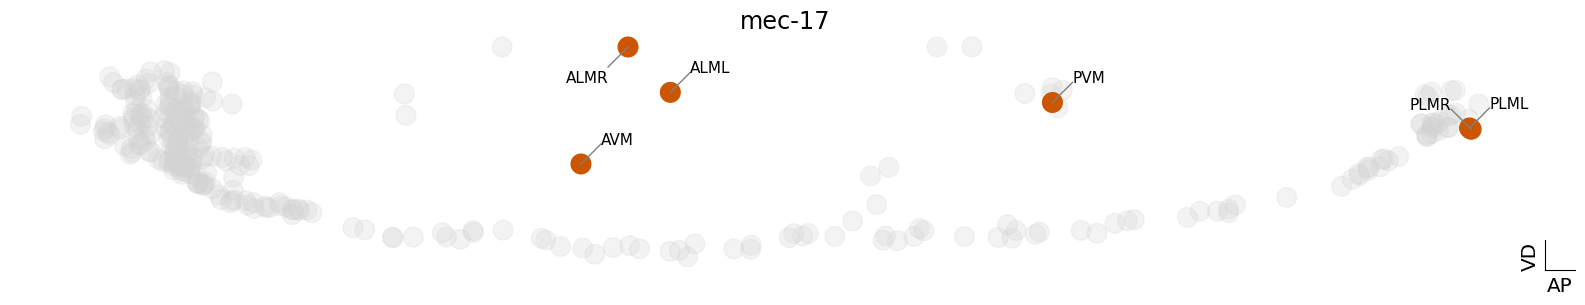

In [4]:
utils.plot_position(nn, highlight=mec_17, axis='AP-VD', title='mec-17', save="mec-17.svg") # Possible combinations of axis: RL-AP, AP-LR, AP-DV, DV-LR, AP-RL, LR-DV, LR-AP, DV-AP

### Now we load the CENGEN transcipts

In [14]:
cengen_threshold_level = 4
utils.loadTranscripts(nn, threshold=cengen_threshold_level)
transcript_of_interest =  'sre-4'

In [15]:
neurons_of_interest = [n.name for n,t in nn.neurons_have('transcript').items() if t[transcript_of_interest]]

[('AWAL', '#CC5500'), ('AWAR', '#CC5500'), ('ASER', '#CC5500'), ('URXL', '#CC5500'), ('URXR', '#CC5500'), ('AQR', '#CC5500'), ('ALML', '#CC5500'), ('ALMR', '#CC5500'), ('AVM', '#CC5500'), ('PLML', '#CC5500'), ('PLMR', '#CC5500'), ('URBL', '#CC5500'), ('URBR', '#CC5500'), ('PVQL', '#CC5500'), ('PVQR', '#CC5500'), ('PVR', '#CC5500'), ('RIGL', '#CC5500'), ('RIGR', '#CC5500')]


/Users/sahilmoza/Library/Caches/pypoetry/virtualenvs/cedne-OqN2BZQP-py3.12/lib/python3.12/site-packages/textalloc/__init__.py:306: UserWarning: Usage of allocate_text will be replaced with allocate in future releases, removing the need for the fig argument
  warnings.warn(


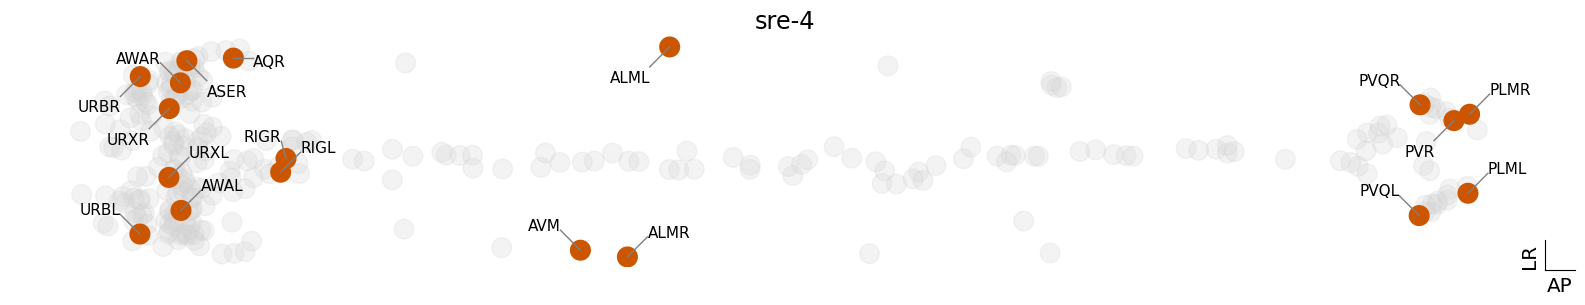

In [17]:
utils.plot_position(nn, highlight=neurons_of_interest, axis='AP-LR', title=transcript_of_interest, save=transcript_of_interest+".pdf")

### We can also look at intersections of several CENGEN transcripts together, which can sometimes be useful to design promoters.

In [14]:
transcripts_of_interest =  ['sre-3', 'sre-4']

In [15]:
neurons_of_interest = [n.name for n,t in nn.neurons_have('transcript').items() if all (t[transcript_of_interest] for transcript_of_interest in transcripts_of_interest)]

[]
['ASJL', 'ASJR', 'ASKL', 'ASKR', 'ASGL', 'ASGR', 'ASIL', 'ASIR', 'AFDL', 'AFDR', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'ASEL', 'ASER', 'ADFL', 'ADFR', 'ASHL', 'ASHR', 'ADLL', 'ADLR', 'BAGL', 'BAGR', 'URXL', 'URXR', 'ALNL', 'ALNR', 'PLNL', 'PLNR', 'SDQL', 'SDQR', 'AQR', 'PQR', 'ADEL', 'ADER', 'PDEL', 'PDER', 'ALML', 'ALMR', 'AVM', 'PVM', 'PLML', 'PLMR', 'FLPL', 'FLPR', 'DVA', 'PVDL', 'PVDR', 'PHAL', 'PHAR', 'PHBL', 'PHBR', 'PHCL', 'PHCR', 'IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'IL2VL', 'IL2VR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'URYDL', 'URYDR', 'URYVL', 'URYVR', 'OLLL', 'OLLR', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL1VR', 'AIML', 'AIMR', 'AINL', 'AINR', 'RIH', 'URBL', 'URBR', 'RIR', 'PVQL', 'PVQR', 'ALA', 'BDUL', 'BDUR', 'AIYL', 'AIYR', 'AIAL', 'AIAR', 'AUAL', 'AUAR', 'AIZL', 'AIZR', 'RIS', 'ADAL', 'ADAR', 'RIFL', 'RIFR', 'PVR', 'AVFL', 'AVFR', 'AVHL', 'AVHR', 'PVPL', 'PVPR', 'PVNL', 'PVNR', 'AVG', 'LUAL', 'LUAR', 'DVB', 'RIBL', 'RIB

ValueError: zero-size array to reduction operation minimum which has no identity

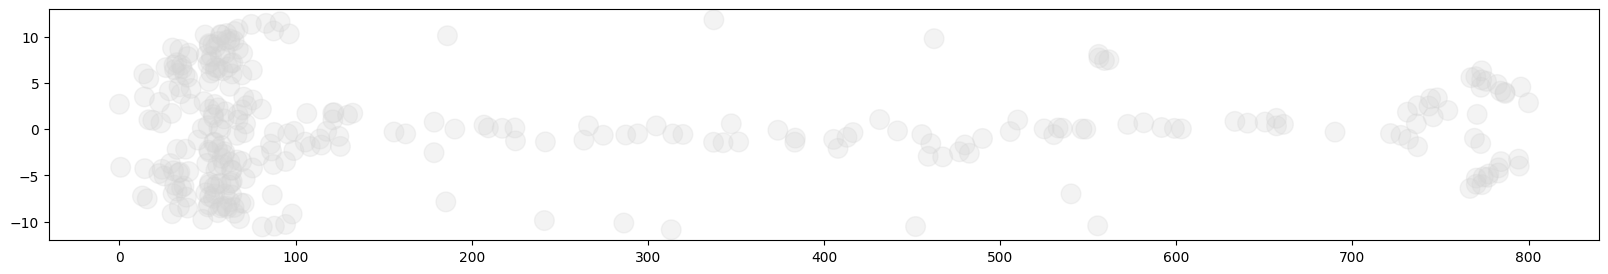

In [16]:
utils.plot_position(nn, highlight=neurons_of_interest, axis='AP-LR')

### View positions of neurons of interest and neighbours in a 3D plot.